# Revision figures

This notebook contains the code to reproduce Figures X and Y.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import spikefinder_eval as se

import scipy.stats as stats

sns.set_style('whitegrid')

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

%matplotlib inline

### Figure 3: Other Measures

In [10]:
data = pd.read_csv('data/results_23_01_18_25Hz.csv', 
                   usecols=['algo', 'dset', 'measure', 'split', 'value', 
                           'cell'])


data.loc[data['value']<0,'value'] = np.NaN


In [11]:
data.loc[data['dset']==1,'indicator'] = 'ogb'
data.loc[data['dset']==2,'indicator'] = 'ogb'
data.loc[data['dset']==4,'indicator'] = 'ogb'
data.loc[data['dset']==3,'indicator'] = 'gcamp'
data.loc[data['dset']==5,'indicator'] = 'gcamp'

In [12]:
order = ['deneux', 'chenkov', 'speiser', 'mineault', 'rupprecht',
       'friedrich', 'pachitariu', 'bolte', 'machado', 'ringach', 'stm',
       'oopsi']
order

['deneux',
 'chenkov',
 'speiser',
 'mineault',
 'rupprecht',
 'friedrich',
 'pachitariu',
 'bolte',
 'machado',
 'ringach',
 'stm',
 'oopsi']

In [44]:
idx = (data['split']=='test') & (data['measure']=='corr')
tmp = data[idx].drop('measure',axis=1).rename(columns={'value': 'corr'})
tmp['varexp'] = tmp['corr']**2

tmp = tmp.groupby(['algo'])['corr','varexp'].mean().reset_index()

tmp['imp'] = 100 * (tmp['varexp']/tmp[tmp['algo']=='stm']['varexp'].values -1)
tmp


,algo,corr,varexp,imp
0,bolte,0.383376,0.164353,13.063914
1,chenkov,0.436637,0.206378,41.974291
2,deneux,0.438228,0.209411,44.060902
3,friedrich,0.418848,0.198489,36.546700
4,machado,0.379407,0.165093,13.572843
5,mineault,0.432472,0.207792,42.947090
6,oopsi,0.253809,0.086592,-40.430750
7,pachitariu,0.396692,0.177642,22.205624
8,ringach,0.375060,0.161422,11.047140
9,rupprecht,0.429115,0.204177,40.459609


In [5]:
data[data['split']=='test'].groupby(['algo','measure']).mean()

cell     dset     value
algo       measure                              
bolte      auc        3.15625  2.96875  0.816049
           corr       3.15625  2.96875  0.383376
           corr_bits  3.15625  2.96875  0.268366
           info       3.15625  2.96875  2.414993
           rank       3.15625  2.96875  0.262271
chenkov    auc        3.15625  2.96875  0.845612
           corr       3.15625  2.96875  0.436637
           corr_bits  3.15625  2.96875  0.344640
           info       3.15625  2.96875  3.117814
           rank       3.15625  2.96875  0.290500
deneux     auc        3.15625  2.96875  0.846106
           corr       3.15625  2.96875  0.438228
           corr_bits  3.15625  2.96875  0.353142
           info       3.15625  2.96875  2.922398
           rank       3.15625  2.96875  0.288643
friedrich  auc        3.15625  2.96875  0.821515
           corr       3.15625  2.96875  0.418848
           corr_bits  3.15625  2.96875  0.334318
           info       3.15625  2.96875  2.777649
           rank       3.15625  2.96875  0.309133
machado    auc        3.15625  2.96875  0.807272
           corr       3.15625  2.96875  0.379407
           corr_bits  3.15625  2.96875  0.271934
           info       3.15625  2.96875  2.217505
           rank       3.15625  2.96875  0.280297
mineault   auc        3.15625  2.96875  0.815195
           corr       3.15625  2.96875  0.432472
           corr_bits  3.15625  2.96875  0.350802
           info       3.15625  2.96875  2.816428
           rank       3.15625  2.96875  0.325913
oopsi      auc        3.15625  2.96875  0.658341
           corr       3.15625  2.96875  0.253809
           corr_bits  3.15625  2.96875  0.137344
           info       3.15625  2.96875  1.107144
           rank       3.15625  2.96875  0.198595
pachitariu auc        3.15625  2.96875  0.828681
           corr       3.15625  2.96875  0.396692
           corr_bits  3.15625  2.96875  0.293112
           info       3.15625  2.96875  2.797023
           rank       3.15625  2.96875  0.281282
ringach    auc        3.15625  2.96875  0.784200
           corr       3.15625  2.96875  0.375060
           corr_bits  3.15625  2.96875  0.256786
           info       3.15625  2.96875  2.253077
           rank       3.15625  2.96875  0.281026
rupprecht  auc        3.15625  2.96875  0.841629
           corr       3.15625  2.96875  0.429115
           corr_bits  3.15625  2.96875  0.342567
           info       3.15625  2.96875  2.724838
           rank       3.15625  2.96875  0.284141
speiser    auc        3.15625  2.96875  0.850769
           corr       3.15625  2.96875  0.434734
           corr_bits  3.15625  2.96875  0.346070
           info       3.15625  2.96875  3.085813
           rank       3.15625  2.96875  0.292649
stm        auc        3.15625  2.96875  0.820764
           corr       3.15625  2.96875  0.357193
           corr_bits  3.15625  2.96875  0.234199
           info       3.15625  2.96875  2.468166
           rank       3.15625  2.96875  0.268781

C:\Users\pberens\Anaconda3\lib\site-packages\seaborn\categorical.py:3057: UserWarning: The `dropna` parameter has been removed
  warnings.warn("The `dropna` parameter has been removed", UserWarning)


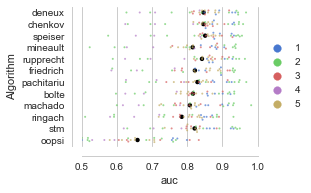

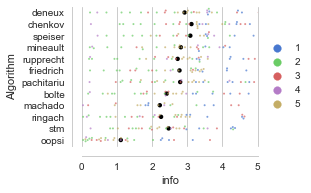

In [56]:
measures = ['auc', 'info']



for m, measure in enumerate(measures):
    f = plt.figure(figsize=(8/2.54,6.5/2.54))

    #plt.subplot(3,1,m+1)

    idx = (data['split']=='test') & (data['measure']==measure)

    ax = sns.swarmplot(data=data[idx], 
                   x='value', y='algo',hue='dset',
                   order=order,palette="muted", alpha=.7, size=2 , orient='h')

    sns.pointplot(data=data[idx], 
                   x='value', y='algo', estimator = np.mean, ci=False,
                   order=order,color='k', join=False, markers='.',
                    legend_out=False, orient='h', scale=.7, dropna=True)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.xlabel(measure)
    plt.ylabel('Algorithm')
    
    if measure=='auc':
        ax.set_xlim(.5, 1)
    elif measure=='info':
        ax.set_xlim(0, 5)
    
    
    sns.despine(offset=10)
    
    data[idx].groupby(['algo']).mean()
    

    f.savefig('figures/fig3_{}.pdf'.format(measure),bbox_inches='tight')


### Figure 2: Different temporal resolution

In [6]:
freqs = [25, 12, 6, 3]

data = pd.DataFrame(columns = ['value', 'algo', 'dset', 'split','measure', 'cell','freq'])

for f, freq in enumerate(freqs):

    tmp = pd.read_csv('data/results_23_01_18_{}Hz.csv'.format(freq), 
                   usecols=['algo', 'dset', 'measure', 'split', 'value', 
                           'cell'])
    
    idx = (tmp['split']=='test') & (tmp['measure']=='corr')
    
    tmp = tmp[idx]
    tmp['freq'] = np.round(1000*1/freq)
    
    data = pd.concat([data,tmp])
    


C:\Users\pberens\Anaconda3\lib\site-packages\seaborn\categorical.py:3057: UserWarning: The `dropna` parameter has been removed
  warnings.warn("The `dropna` parameter has been removed", UserWarning)


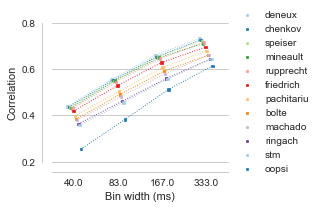

In [47]:
f = plt.figure(figsize=(8/2.54,6.5/2.54))

ax = sns.pointplot(data=data, 
                   x='freq', y='value', hue='algo',estimator = np.mean, ci=False,
                   join=True, markers='s',dodge=.3, hue_order=order,scale=.3,linestyles=':',
                   legend_out=False, dropna=True, palette=sns.color_palette("Paired",10))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_xlabel('Bin width (ms)')
ax.set_ylabel('Correlation')
ax.set_ylim((0.2,.8))



sns.despine(offset=10)

f.savefig('figures/fig2_p.pdf',bbox_inches='tight')



In [52]:
data.groupby(['algo','freq']).mean()

value
algo       freq           
bolte      40.0   0.383376
           83.0   0.490498
           167.0  0.590467
           333.0  0.659169
chenkov    40.0   0.436637
           83.0   0.551983
           167.0  0.653110
           333.0  0.724877
deneux     40.0   0.438228
           83.0   0.555124
           167.0  0.660314
           333.0  0.731465
friedrich  40.0   0.418848
           83.0   0.528590
           167.0  0.627604
           333.0  0.694370
machado    40.0   0.379407
           83.0   0.481838
           167.0  0.579201
           333.0  0.660699
mineault   40.0   0.432472
           83.0   0.549973
           167.0  0.649254
           333.0  0.709583
oopsi      40.0   0.253809
           83.0   0.381984
           167.0  0.512429
           333.0  0.613647
pachitariu 40.0   0.396692
           83.0   0.503515
           167.0  0.606154
           333.0  0.678405
ringach    40.0   0.362944
           83.0   0.461068
           167.0  0.558897
           333.0  0.641900
rupprecht  40.0   0.429115
           83.0   0.545157
           167.0  0.645482
           333.0  0.714896
speiser    40.0   0.434734
           83.0   0.547386
           167.0  0.653304
           333.0  0.721790
stm        40.0   0.357193
           83.0   0.455334
           167.0  0.556224
           333.0  0.643924